In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [2]:
#Get File Name and load file into dataframe
filename = os.path.join(os.getcwd(), "data", "stackoverflow_survey.csv")
df = pd.read_csv(filename)

In [3]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
print(list(df.columns))

['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFr

In [5]:
#Drop first column and only include country edlevel and years, employment and compYearly
df = df.drop(index=0)
df = df[['Country','EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [6]:
#remove rows with null salaries
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [8]:
# Drop any rows with empty columns
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
# Only Keep rows with full time employment
df = df[df['Employment'].str.contains('Employed, full-time', case=False, regex=False)]
df = df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42709 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       42709 non-null  object 
 1   EdLevel       42709 non-null  object 
 2   YearsCodePro  42709 non-null  object 
 3   Salary        42709 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.6+ MB


In [10]:
df['Country'].value_counts()

Country
United States of America                                11270
Germany                                                  3402
United Kingdom of Great Britain and Northern Ireland     3216
Canada                                                   1944
India                                                    1746
                                                        ...  
Lesotho                                                     1
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Antigua and Barbuda                                         1
Name: count, Length: 167, dtype: int64

In [11]:
# Shorten Categories till the cutoff value
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [12]:
# Only Keep Countries with the values >= 400
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                11270
Other                                                    9743
Germany                                                  3402
United Kingdom of Great Britain and Northern Ireland     3216
Canada                                                   1944
India                                                    1746
France                                                   1553
Brazil                                                   1113
Netherlands                                              1087
Australia                                                1071
Spain                                                    1020
Poland                                                    958
Sweden                                                    947
Italy                                                     877
Switzerland                                               540
Denmark                                                   468


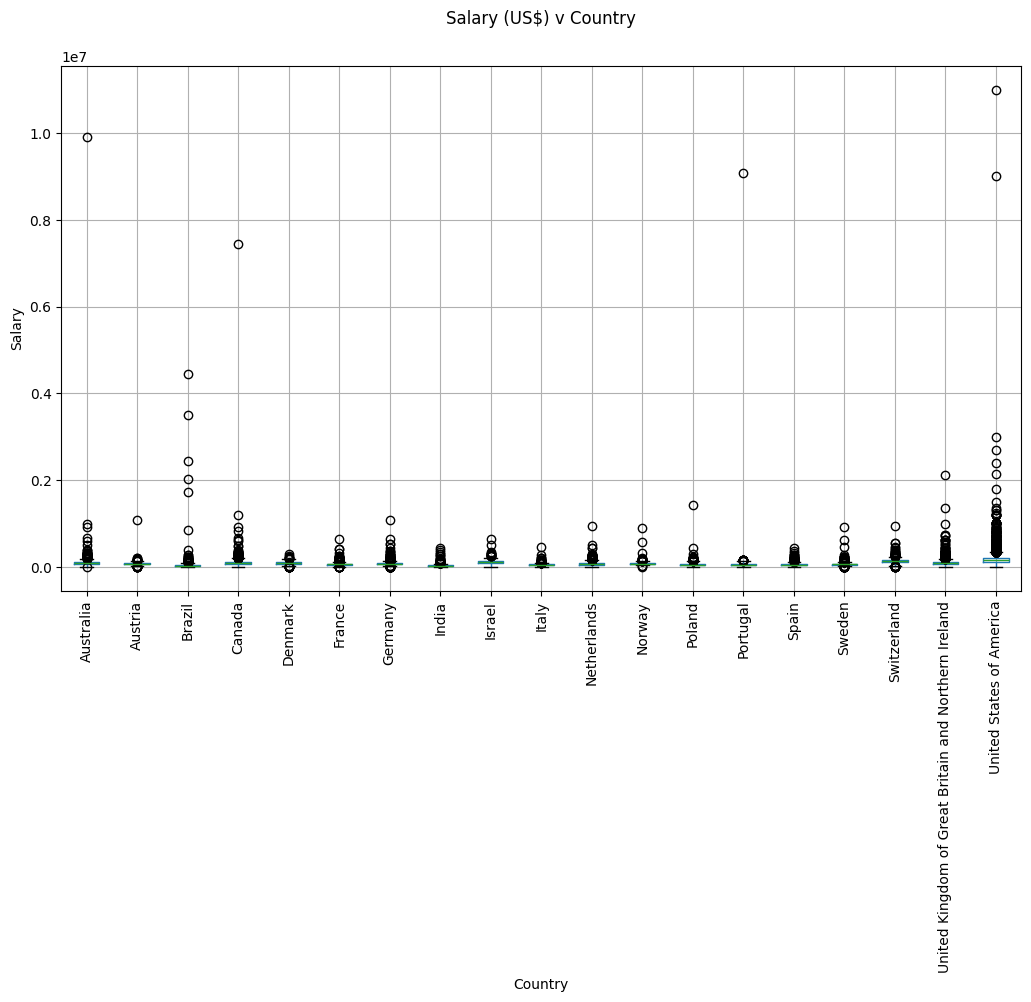

In [13]:
df = df[df['Country'] != 'Other']
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Remove salaries greater than 250000 and less than 10000
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]

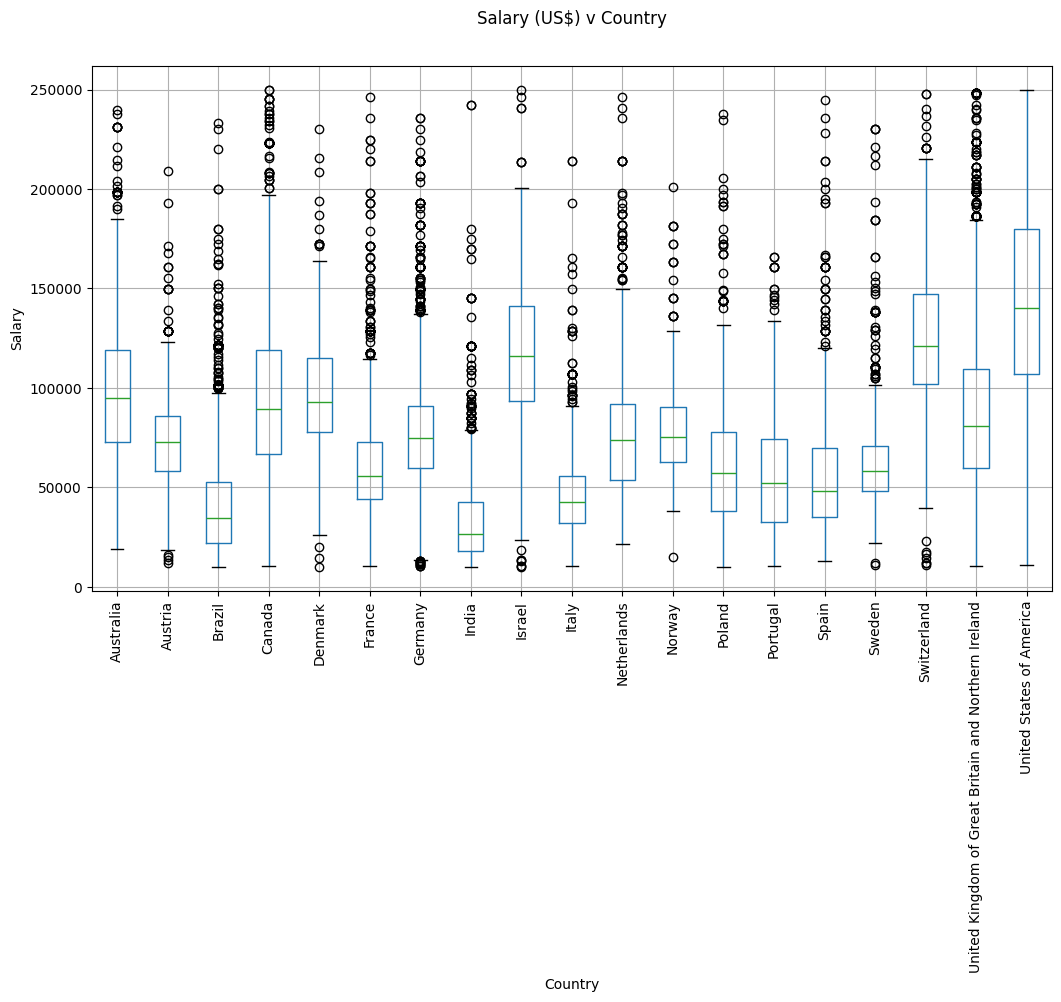

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [16]:
df['YearsCodePro'].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '11', '8', '18', '30', '27', '17', '43', '26', '38', '33',
       '29', '22', '1', '34', '42', '31', '36', '39', '35', '40', '32',
       '44', '37', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [17]:
# Convert Experience to Int
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 1
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [18]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [19]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [20]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode Education Labels
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()


array([0, 1, 2, 3])

In [22]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([18, 17,  0, 10,  6, 15,  5, 14,  2, 13,  9,  3, 16,  7,  1, 11, 12,
        4,  8])

In [23]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

In [26]:
# Train Model
model_LR = LinearRegression()

model_LR.fit(X_train, y_train)

predictions = model_LR.predict(X_test)

In [27]:
# Compute Accuracy
error = np.sqrt(mean_squared_error(y_test, predictions))
print("== MeanSquared Error:", error)

== MeanSquared Error: 46590.12785874085


In [28]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree
model_DT = DecisionTreeRegressor(random_state=0)
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
# make predictions and get error
DT_predictions = model_DT.predict(X_test)

error_DT = np.sqrt(mean_squared_error(y_test, DT_predictions))
print("== MeanSquared Error:", error_DT)

== MeanSquared Error: 36401.41069862532


In [30]:
from sklearn.ensemble import RandomForestRegressor

#Train Random Forest
model_RF = RandomForestRegressor(random_state=0)
model_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [31]:
# Make predictions and compute error
RF_pred = model_RF.predict(X_test)

RF_error = np.sqrt(mean_squared_error(y_test, RF_pred))
print("== MeanSquared Error:", RF_error)

== MeanSquared Error: 36144.39279156101


In [32]:
# Find best parameters
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

model_DT = DecisionTreeRegressor(random_state=0)
grid = GridSearchCV(model_DT, parameters, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [33]:
model_DT = grid.best_estimator_

model_DT.fit(X_train, y_train)

DT_predictions = model_DT.predict(X_test)
error_DT = np.sqrt(mean_squared_error(y_test, DT_predictions))
print("== MeanSquared Error:", error_DT)

== MeanSquared Error: 35692.75186611142


In [34]:
#Create New Data
new_arr = np.array([['United States of America', 'Master’s degree', 15]])
new_arr

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [35]:
new_arr[:, 0] = le_country.transform(new_arr[:, 0])
new_arr[:, 1] = le_education.transform(new_arr[:, 1])
new_arr = new_arr.astype(float)
new_arr

array([[18.,  2., 15.]])

In [36]:
new_data_pred = model_DT.predict(new_arr)
new_data_pred

/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([174418.45833333])

In [38]:
import pickle

In [39]:
data = {"model": model_DT, "le_country": le_country, "le_education": le_education}
with open('salaryPredModel.pkl', 'wb') as file:
    pickle.dump(data, file)

In [40]:
with open('salaryPredModel.pkl', 'rb') as file:
    data = pickle.load(file)

model_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [41]:
y_pred = model_loaded.predict(new_arr)
y_pred

/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([174418.45833333])